In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('spending_patterns_detailed.csv')
df.head()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,CUST_0159,Groceries,Milk,1,1.28,1.28,Debit Card,Mobile App,2024-11-13
1,CUST_0017,Friend Activities,Dinner with Friends,2,74.69,149.39,Debit Card,In-store,2023-05-04
2,CUST_0094,Housing and Utilities,Water Bill,1,76.06,76.06,Digital Wallet,Mobile App,2023-12-16
3,CUST_0162,Fitness,Yoga Class,5,11.24,56.18,Cash,In-store,2024-01-28
4,CUST_0129,Gifts,Flowers,3,43.71,131.12,Debit Card,In-store,2023-07-28


In [3]:
df.tail()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,CUST_0072,Housing and Utilities,Water Bill,1,69.46,69.46,Debit Card,Online,2023-09-01
9996,CUST_0150,Groceries,Snacks,5,15.54,77.70,Debit Card,In-store,2024-06-27
9997,CUST_0122,Shopping,Electronics,1,732.03,732.03,Debit Card,In-store,2024-03-19
9998,CUST_0133,Transportation,Car Repair,1,107.63,107.63,Debit Card,Mobile App,2024-10-17
9999,CUST_0058,Housing and Utilities,Gas Bill,1,98.79,98.79,Credit Card,Mobile App,2024-08-04


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       10000 non-null  object 
 1   Category          10000 non-null  object 
 2   Item              10000 non-null  object 
 3   Quantity          10000 non-null  int64  
 4   Price Per Unit    10000 non-null  float64
 5   Total Spent       10000 non-null  float64
 6   Payment Method    10000 non-null  object 
 7   Location          10000 non-null  object 
 8   Transaction Date  10000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 703.3+ KB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer ID,10000,200,CUST_0142,72,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10000,13,Groceries,799,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item,10000,48,Dentist Visit,278,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,10000.0,NaN,NaN,NaN,2.2372,1.481133,1.0,1.0,1.0,3.0,5.0
Price Per Unit,10000.0,NaN,NaN,NaN,969.957948,6104.403843,1.0,12.96,51.86,177.5875,74246.46
Total Spent,10000.0,NaN,NaN,NaN,2534.75089,19676.741772,1.11,25.9575,88.115,336.375,352230.76
Payment Method,10000,4,Digital Wallet,2560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,10000,3,In-store,3387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transaction Date,10000,744,2023-12-29,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

Customer ID         0
Category            0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

In [7]:
df.shape

(10000, 9)

In [8]:
df['Customer ID'].nunique()

200

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
pn=df['Category'].value_counts()
pn

Category
Groceries                799
Fitness                  799
Food                     794
Gifts                    789
Shopping                 775
Medical/Dental           770
Personal Hygiene         768
Housing and Utilities    764
Transportation           762
Travel                   753
Friend Activities        748
Subscriptions            740
Hobbies                  739
Name: count, dtype: int64

In [11]:
df['Item'].value_counts()

Item
Dentist Visit          278
Coffee                 273
Workout Equipment      272
Fast Food              267
Yoga Class             266
Dinner with Friends    266
Personal Trainer       261
Gas                    261
Plane Ticket           259
Taxi/Uber              257
Streaming Service      255
Restaurant Meal        254
Movie Tickets          253
Medicine               252
Public Transit         251
Car Repair             250
Magazine               243
Gym Membership         242
Doctor Visit           240
Hotel Stay             237
Concert Tickets        229
Flowers                216
Crochet Supplies       210
Rent                   205
Electronics            204
Water Bill             204
Soap                   201
Kids Games             198
Toothpaste             196
Books                  196
Car                    194
Shoes                  192
Gas Bill               190
Jewelry                189
Shampoo                189
Gift Cards             186
Clothes                

In [12]:
df['Item'].nunique()

48

In [13]:
df['Payment Method'].value_counts()

Payment Method
Digital Wallet    2560
Credit Card       2499
Cash              2478
Debit Card        2463
Name: count, dtype: int64

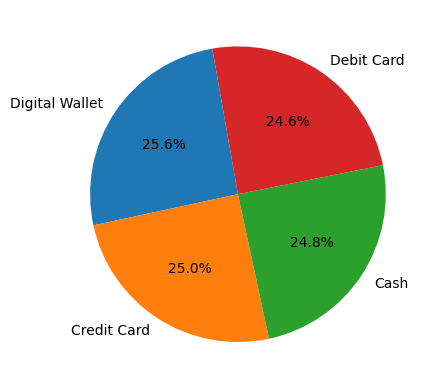

In [14]:
count=df['Payment Method'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=100)
plt.show()

In [15]:
df['Location'].value_counts()

Location
In-store      3387
Online        3307
Mobile App    3306
Name: count, dtype: int64

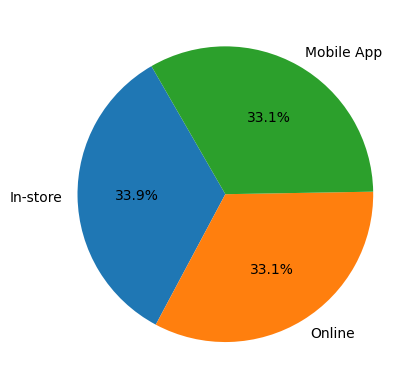

In [16]:
count = df['Location'].value_counts()
plt.pie(count, labels= count.index, autopct= "%1.1f%%", startangle=120)
plt.show()

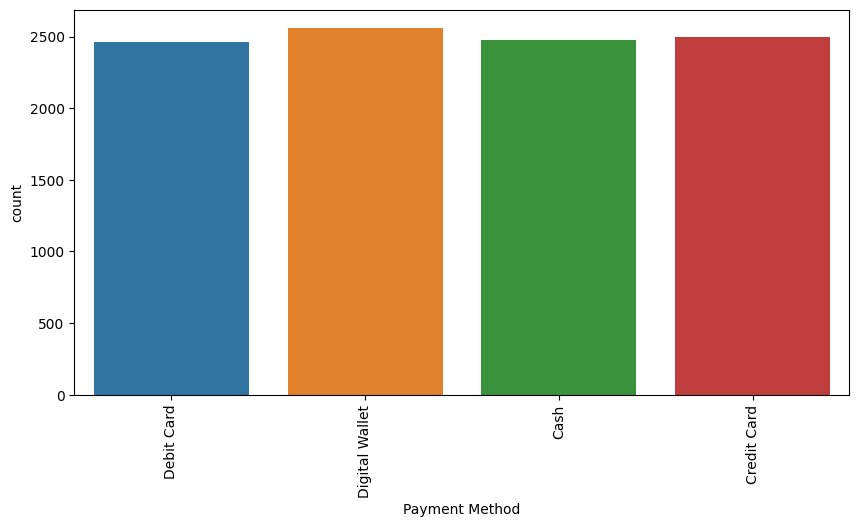

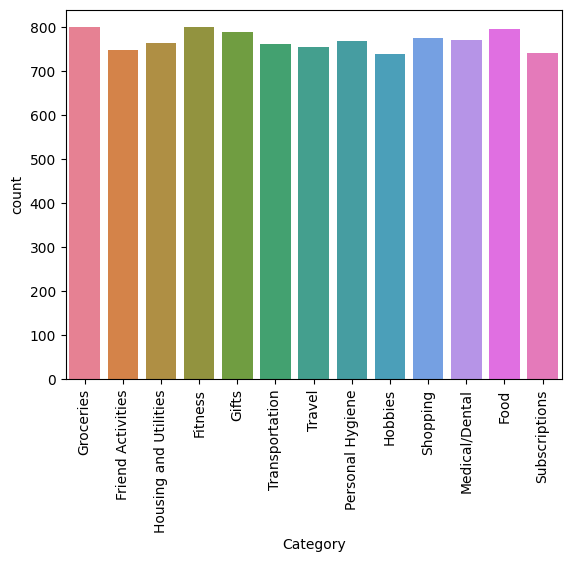

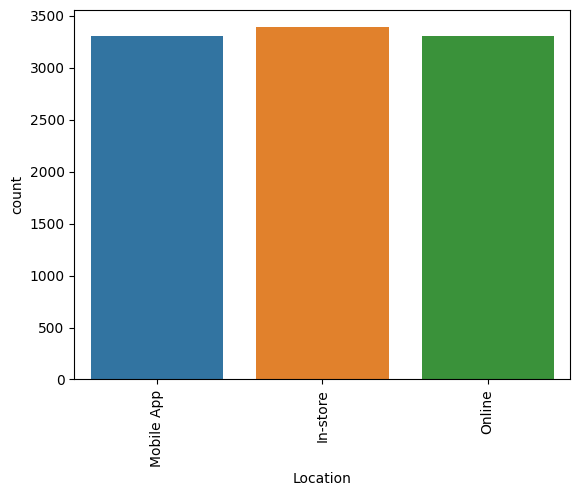

In [17]:
plt.figure(figsize=(10,5))
for col in ['Payment Method', 'Category', 'Location']:
    sns.countplot(df, x=col, hue=col)
    plt.xticks(rotation=90)
    plt.show()    

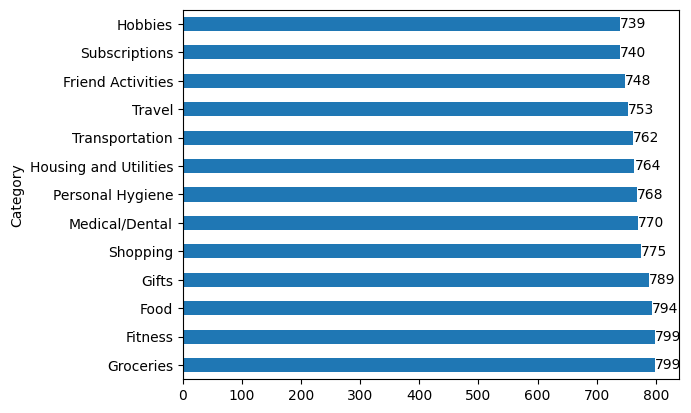

In [18]:
ax=df['Category'].value_counts().plot(kind='barh')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

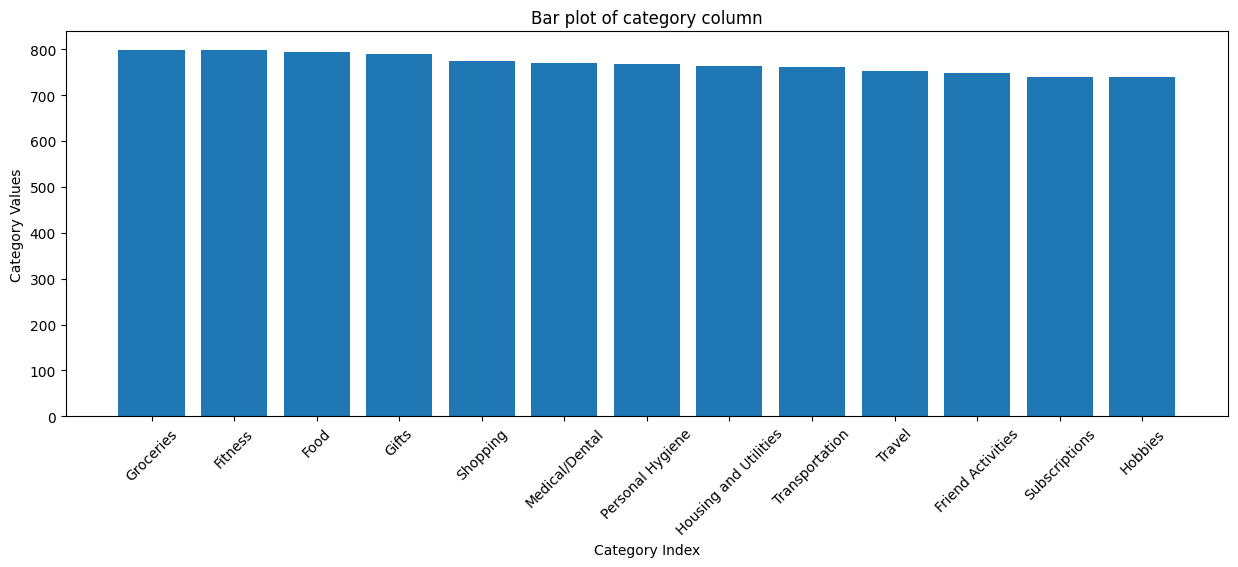

In [19]:
plt.figure(figsize=(15,5))
category_index = pn.index
category_value = pn.values

plt.bar(category_index, category_value)
plt.xlabel('Category Index')
plt.ylabel('Category Values')
plt.title('Bar plot of category column')
plt.xticks(rotation=45)
plt.show()


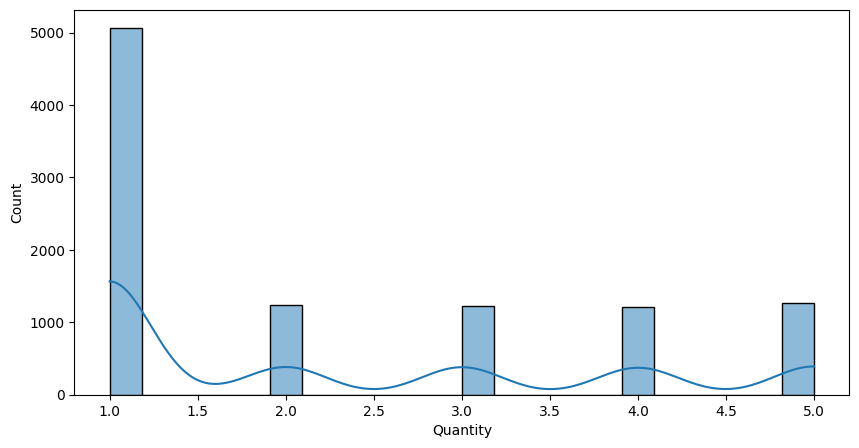

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df, x='Quantity', kde=True)
plt.show()

In [21]:
df.groupby('Item')['Payment Method'].value_counts()

Item               Payment Method
Art Supplies       Digital Wallet    48
                   Debit Card        45
                   Cash              44
                   Credit Card       36
Books              Credit Card       52
                                     ..
Workout Equipment  Cash              65
Yoga Class         Digital Wallet    75
                   Credit Card       72
                   Cash              63
                   Debit Card        56
Name: count, Length: 192, dtype: int64

In [22]:
df.groupby('Item')['Location'].value_counts()

Item               Location  
Art Supplies       Online        61
                   Mobile App    60
                   In-store      52
Books              Online        70
                   In-store      65
                                 ..
Workout Equipment  Online        89
                   In-store      81
Yoga Class         In-store      95
                   Mobile App    90
                   Online        81
Name: count, Length: 144, dtype: int64

In [23]:
df.groupby('Item')['Total Spent'].sum().sort_values(ascending=False).head(10)

Item
Car                   22051024.82
Rent                    779209.26
Electronics             493672.91
Skin Care Products      228460.95
Workout Equipment       223439.45
Plane Ticket            196548.44
Jewelry                 163053.75
Doctor Visit            117532.02
Car Repair              111401.89
Medicine                100748.42
Name: Total Spent, dtype: float64

In [24]:
df.groupby('Category')['Total Spent'].sum().sort_values(ascending=False).head(10)

Category
Shopping                 22654524.44
Housing and Utilities      835391.63
Fitness                    336101.51
Medical/Dental             294709.10
Travel                     282709.49
Gifts                      250006.58
Personal Hygiene           239692.29
Friend Activities          150240.96
Transportation             129638.53
Hobbies                     84474.23
Name: Total Spent, dtype: float64

In [25]:
df.groupby('Payment Method')['Total Spent'].sum().sort_values(ascending=False)

Payment Method
Digital Wallet    7754538.81
Cash              7293700.66
Credit Card       6531489.36
Debit Card        3767780.07
Name: Total Spent, dtype: float64

In [26]:
df.groupby('Category')['Quantity'].sum()

Category
Fitness                  2427
Food                     2355
Friend Activities        2296
Gifts                    2364
Groceries                2410
Hobbies                  2131
Housing and Utilities     764
Medical/Dental            770
Personal Hygiene         2331
Shopping                 2269
Subscriptions             740
Transportation            762
Travel                    753
Name: Quantity, dtype: int64

In [27]:
df.groupby('Item')['Quantity'].sum().sort_values(ascending=False).head(10)

Item
Dinner with Friends    823
Yoga Class             819
Coffee                 815
Workout Equipment      813
Personal Trainer       795
Movie Tickets          787
Fast Food              787
Restaurant Meal        753
Concert Tickets        686
Flowers                651
Name: Quantity, dtype: int64

In [28]:
data=df[df['Payment Method']=='Credit Card']
data.head()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
8,CUST_0116,Travel,Plane Ticket,1,1011.41,1011.41,Credit Card,In-store,2023-08-15
15,CUST_0008,Gifts,Jewelry,2,282.27,564.54,Credit Card,Mobile App,2023-12-29
18,CUST_0023,Medical/Dental,Dentist Visit,1,333.68,333.68,Credit Card,In-store,2024-08-15
20,CUST_0041,Shopping,Clothes,3,37.80,113.40,Credit Card,Online,2024-11-06
23,CUST_0155,Food,Restaurant Meal,1,64.18,64.18,Credit Card,In-store,2024-09-06


In [29]:
data['Location'].value_counts()

Location
In-store      873
Mobile App    848
Online        778
Name: count, dtype: int64

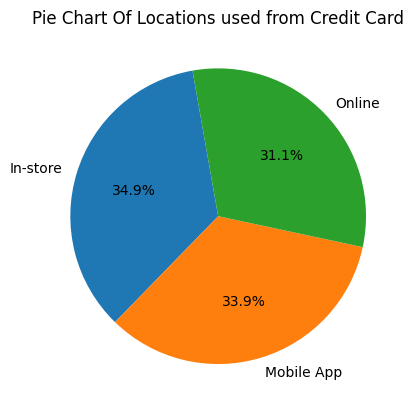

In [30]:
count=data['Location'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=100)
plt.title('Pie Chart Of Locations used from Credit Card')
plt.show()

In [31]:
data.groupby('Category')['Total Spent'].sum()

Category
Fitness                    91133.09
Food                       12001.93
Friend Activities          40486.24
Gifts                      50132.89
Groceries                   4310.53
Hobbies                    20101.89
Housing and Utilities     180363.93
Medical/Dental             71724.38
Personal Hygiene           69699.53
Shopping                 5886973.86
Subscriptions               4325.33
Transportation             27419.80
Travel                     72815.96
Name: Total Spent, dtype: float64

In [32]:
data['Transaction Date']=pd.to_datetime(data['Transaction Date'])

In [33]:
data['year']=data['Transaction Date'].dt.strftime('%Y')
data['month']=data['Transaction Date'].dt.strftime('%m')
data['day']=data['Transaction Date'].dt.strftime('%w')

data.head()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,year,month,day
8,CUST_0116,Travel,Plane Ticket,1,1011.41,1011.41,Credit Card,In-store,2023-08-15,2023,08,2
15,CUST_0008,Gifts,Jewelry,2,282.27,564.54,Credit Card,Mobile App,2023-12-29,2023,12,5
18,CUST_0023,Medical/Dental,Dentist Visit,1,333.68,333.68,Credit Card,In-store,2024-08-15,2024,08,4
20,CUST_0041,Shopping,Clothes,3,37.80,113.40,Credit Card,Online,2024-11-06,2024,11,3
23,CUST_0155,Food,Restaurant Meal,1,64.18,64.18,Credit Card,In-store,2024-09-06,2024,09,5


In [34]:
dp=data.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)
dp

Category
Shopping                 5886973.86
Housing and Utilities     180363.93
Fitness                    91133.09
Travel                     72815.96
Medical/Dental             71724.38
Personal Hygiene           69699.53
Gifts                      50132.89
Friend Activities          40486.24
Transportation             27419.80
Hobbies                    20101.89
Food                       12001.93
Subscriptions               4325.33
Groceries                   4310.53
Name: Total Spent, dtype: float64

In [35]:
dp.to_csv('C:/Users/Administrator/Desktop/dp.csv')

In [36]:
yearly_sales=data.groupby(['Category', 'year']).count()['Transaction Date'].reset_index().rename(columns={'Transaction Date': 'count'}).pivot(index='year', columns='Category', values='count').reset_index()
yearly_sales.T

,0,1,2
Category,,,
year,2023,2024,2025
Fitness,105,98,2
Food,105,97,2
Friend Activities,98,104,5
Gifts,102,90,3
Groceries,91,103,7
Hobbies,87,85,1
Housing and Utilities,86,85,2
Medical/Dental,86,92,5


<Axes: >

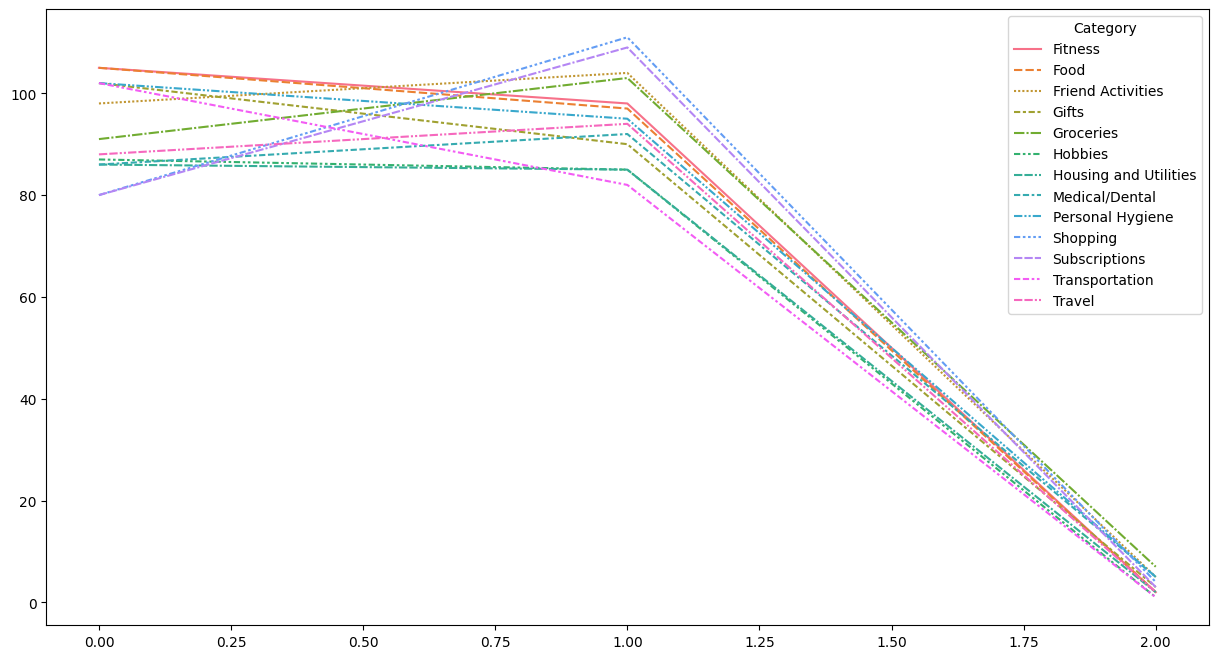

In [37]:
plt.figure(figsize=(15,8))
sns.lineplot(data=yearly_sales)

In [38]:
monthly_sales=data.groupby(['Category', 'month']).count()['Transaction Date'].reset_index().rename(columns={'Transaction Date': 'count'}).pivot(index='month', columns='Category', values='count').reset_index()
monthly_sales.T

,0,1,2,3,4,5,6,7,8,9,10,11
Category,,,,,,,,,,,,
month,01,02,03,04,05,06,07,08,09,10,11,12
Fitness,26,14,12,15,18,12,21,19,21,13,13,21
Food,17,14,8,20,30,20,18,19,17,14,12,15
Friend Activities,20,16,16,15,24,14,15,19,20,17,11,20
Gifts,15,17,13,20,22,18,15,14,10,13,20,18
Groceries,22,20,13,16,18,13,17,12,16,13,23,18
Hobbies,14,19,13,9,13,8,13,20,14,15,13,22
Housing and Utilities,18,13,16,19,17,9,12,12,13,13,13,18
Medical/Dental,17,15,15,23,19,15,11,11,13,14,21,9


<Axes: >

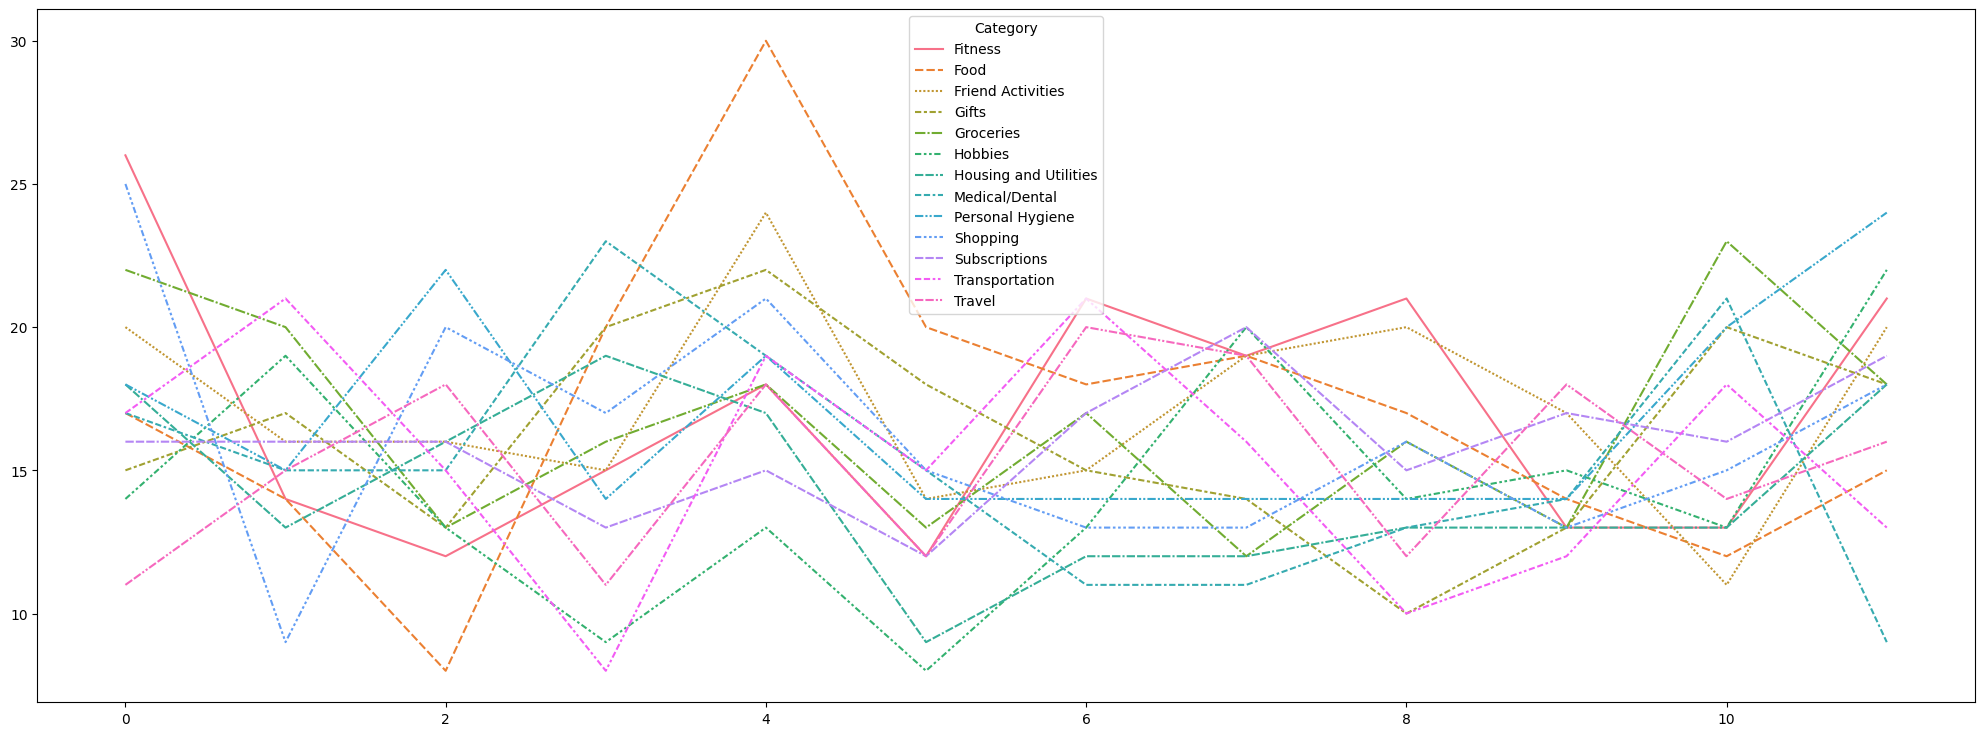

In [39]:
plt.figure(figsize=(25,9))
sns.lineplot(data=monthly_sales)

In [40]:
weekly_sales=data.groupby('day').count()['Transaction Date'].reset_index().rename(columns={'Transaction Date':'count'})
weekly_sales

,day,count
0,0,379
1,1,367
2,2,337
3,3,339
4,4,355
5,5,357
6,6,365


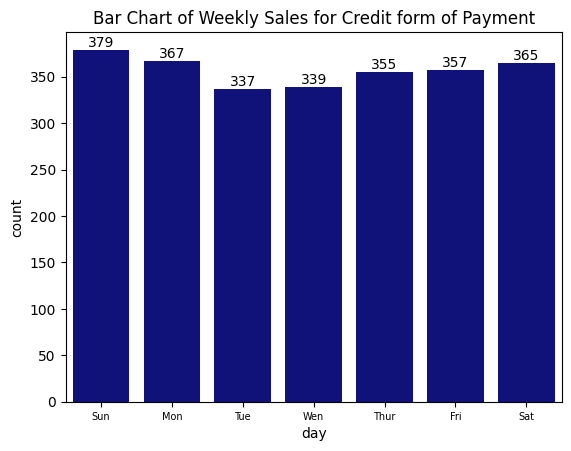

In [41]:
ax=sns.barplot(weekly_sales, x='day', y='count', color='darkblue')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(range(len(weekly_sales['day'])),['Sun','Mon','Tue','Wen','Thur','Fri','Sat'],size=7)
plt.title('Bar Chart of Weekly Sales for Credit form of Payment')
plt.show()

In [42]:
data1=df[df['Payment Method']=='Cash']
data1.head()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
3,CUST_0162,Fitness,Yoga Class,5,11.24,56.18,Cash,In-store,2024-01-28
11,CUST_0110,Transportation,Car Repair,1,349.07,349.07,Cash,In-store,2023-05-12
17,CUST_0136,Shopping,Shoes,1,122.22,122.22,Cash,In-store,2023-11-29
22,CUST_0163,Food,Fast Food,5,6.32,31.59,Cash,Mobile App,2024-04-14
38,CUST_0058,Transportation,Gas,1,47.95,47.95,Cash,In-store,2023-08-09


In [43]:
data1['Location'].value_counts()

Location
Online        869
In-store      808
Mobile App    801
Name: count, dtype: int64

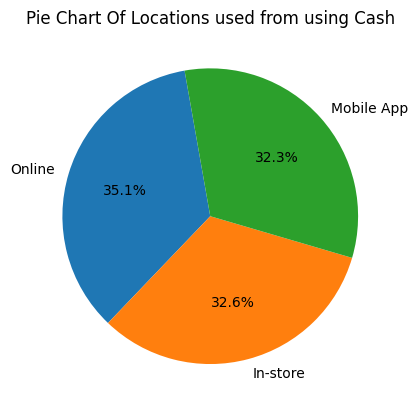

In [44]:
count=data1['Location'].value_counts()
plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=100)
plt.title('Pie Chart Of Locations used from using Cash')
plt.show()

In [45]:
data1.groupby('Category')['Total Spent'].sum().sort_values(ascending=False)

Category
Shopping                 6679696.97
Housing and Utilities     164583.58
Fitness                    77671.29
Travel                     69677.36
Medical/Dental             66941.84
Gifts                      59196.47
Personal Hygiene           59121.52
Transportation             37273.23
Friend Activities          35103.55
Hobbies                    21631.24
Food                       13950.02
Groceries                   4468.61
Subscriptions               4384.98
Name: Total Spent, dtype: float64

In [46]:
data1['Transaction Date']=pd.to_datetime(data1['Transaction Date'])

In [47]:
data1['year']=data1['Transaction Date'].dt.strftime('%Y')
data1['month']=data1['Transaction Date'].dt.strftime('%m')
data1['day']=data1['Transaction Date'].dt.strftime('%w')

data1.head()

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date,year,month,day
3,CUST_0162,Fitness,Yoga Class,5,11.24,56.18,Cash,In-store,2024-01-28,2024,01,0
11,CUST_0110,Transportation,Car Repair,1,349.07,349.07,Cash,In-store,2023-05-12,2023,05,5
17,CUST_0136,Shopping,Shoes,1,122.22,122.22,Cash,In-store,2023-11-29,2023,11,3
22,CUST_0163,Food,Fast Food,5,6.32,31.59,Cash,Mobile App,2024-04-14,2024,04,0
38,CUST_0058,Transportation,Gas,1,47.95,47.95,Cash,In-store,2023-08-09,2023,08,3


In [48]:
data1['year'].value_counts()

year
2024    1238
2023    1198
2025      42
Name: count, dtype: int64

In [49]:
data1.groupby(['year', 'Category'])['Total Spent'].sum()

year  Category             
2023  Fitness                    34914.61
      Food                        7622.81
      Friend Activities          17369.07
      Gifts                      19606.53
      Groceries                   2140.09
      Hobbies                     9931.40
      Housing and Utilities      64464.01
      Medical/Dental             32482.15
      Personal Hygiene           24955.81
      Shopping                 2802910.19
      Subscriptions               2381.45
      Transportation             20547.87
      Travel                     29456.75
2024  Fitness                    41616.68
      Food                        6222.28
      Friend Activities          17487.53
      Gifts                      37243.61
      Groceries                   2286.68
      Hobbies                    11614.15
      Housing and Utilities      97984.06
      Medical/Dental             34235.58
      Personal Hygiene           28972.06
      Shopping                 3868181.49
      

In [50]:
yearly_sales1=data1.groupby(['Category', 'year']).count()['Transaction Date'].reset_index().rename(columns={'Transaction Date': 'count'}).pivot(index='year', columns='Category', values='count').reset_index()
yearly_sales1.T

,0,1,2
Category,,,
year,2023,2024,2025
Fitness,90,105,3
Food,104,97,3
Friend Activities,99,78,4
Gifts,73,95,4
Groceries,94,100,3
Hobbies,88,106,2
Housing and Utilities,101,89,2
Medical/Dental,85,89,1


<Axes: >

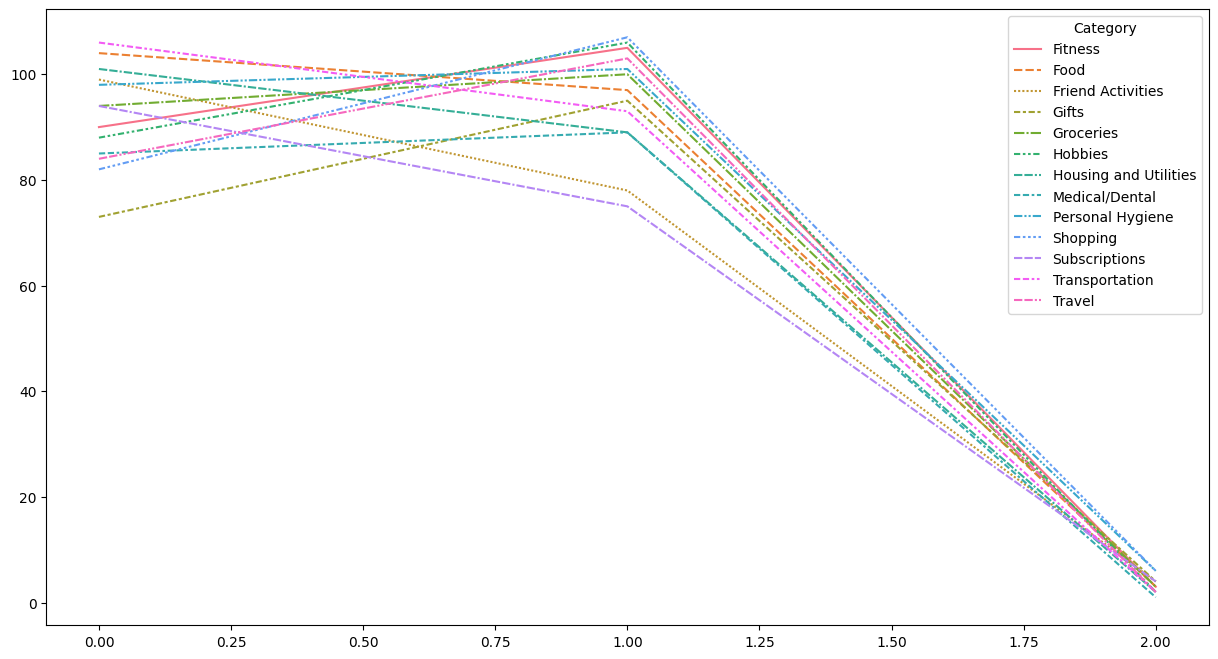

In [51]:
plt.figure(figsize=(15,8))
sns.lineplot(data=yearly_sales1)

In [52]:
monthly_sales1=data1.groupby(['Category', 'month']).count()['Transaction Date'].reset_index().rename(columns={'Transaction Date': 'count'}).pivot(index='month', columns='Category', values='count').reset_index()
monthly_sales1.T

,0,1,2,3,4,5,6,7,8,9,10,11
Category,,,,,,,,,,,,
month,01,02,03,04,05,06,07,08,09,10,11,12
Fitness,18,10,19,15,13,16,18,19,16,11,21,22
Food,22,13,21,23,21,13,18,10,13,14,21,15
Friend Activities,19,11,16,10,19,17,12,16,10,14,15,22
Gifts,13,12,11,20,18,13,22,14,5,14,13,17
Groceries,21,16,22,13,16,12,15,16,14,20,20,12
Hobbies,17,14,11,16,24,15,24,13,13,17,12,20
Housing and Utilities,15,16,18,14,27,17,19,12,11,12,16,15
Medical/Dental,19,18,10,15,14,15,13,16,17,14,12,12


<Axes: >

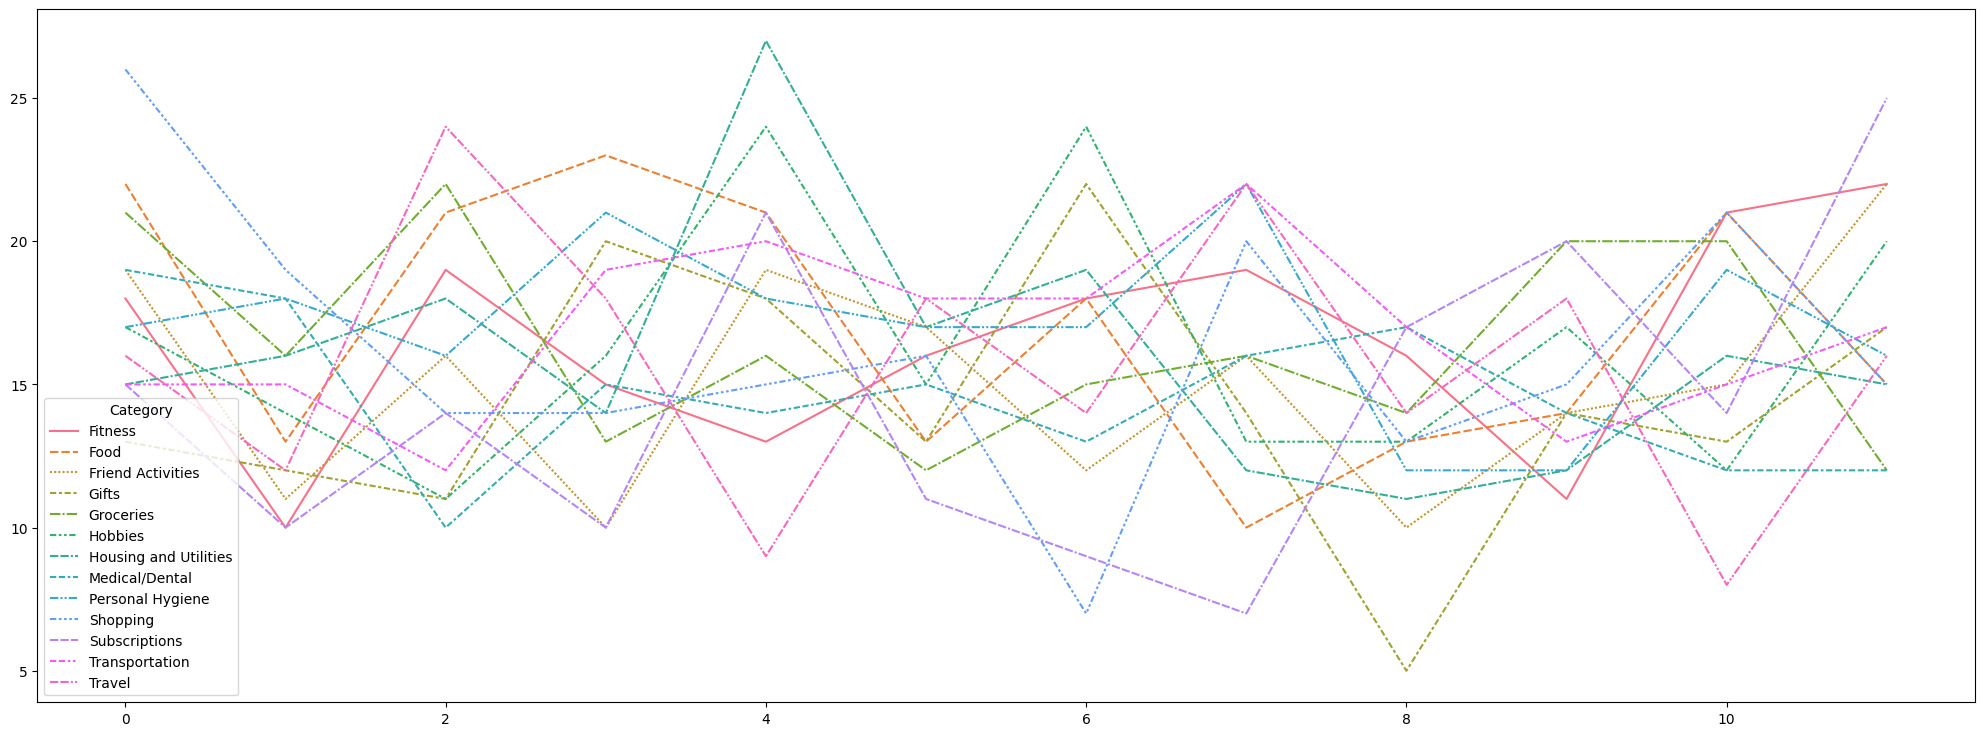

In [53]:
plt.figure(figsize=(25,9))
sns.lineplot(data=monthly_sales1)

In [54]:
weekly_sales1=data1.groupby('day').count()['Transaction Date'].reset_index().rename(columns={'Transaction Date':'count'})
weekly_sales1

,day,count
0,0,381
1,1,372
2,2,346
3,3,356
4,4,360
5,5,334
6,6,329


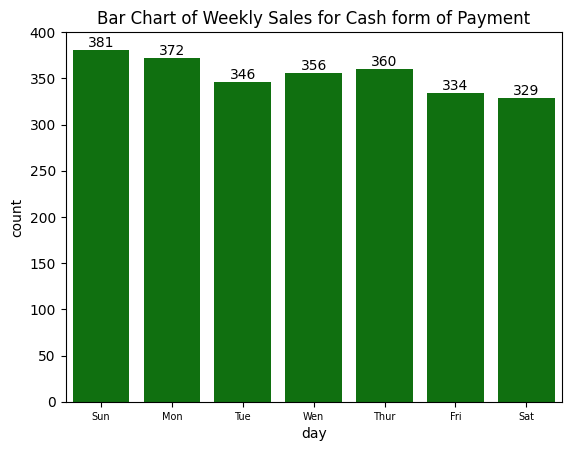

In [55]:
ax=sns.barplot(weekly_sales1, x='day', y='count', color='green')
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(range(len(weekly_sales1['day'])),['Sun','Mon','Tue','Wen','Thur','Fri','Sat'],size=7)
plt.title('Bar Chart of Weekly Sales for Cash form of Payment')
plt.show()